# **Sewage Treatment Results Visulizations:**

## **1. Import library and data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read treatment and control sheet from the dataset

treatment = pd.read_excel("sewage_treatment_results.xlsx", sheet_name= "treatment")
control = pd.read_excel("sewage_treatment_results.xlsx", sheet_name= "control")

## **2. Treatment Results:**

In [3]:
# Melt the data
treatment_melted = treatment.melt(id_vars=["Parameters"], var_name="Day", value_name="Measurement")
treatment_melted

,Parameters,Day,Measurement
0,pH,Day 1,7.24±0.01
1,EC,Day 1,0.75±0.01
2,TA,Day 1,191.00±0.71
3,Cl-,Day 1,84.69±0.66
4,Ca2+,Day 1,63.54±0.36
...,...,...,...
65,PO43-,Day 20,1.57±0.02
66,SO42-,Day 20,25.00±1.41
67,NO3-,Day 20,4.05±0.11
68,TN,Day 20,35.29±0.54


In [4]:
# Create a function to seaprate mean and std from the Measurement Column
import re

def separate_mean_std(value):
    # Strip any leading/trailing whitespace
    value = value.strip()
    
    # Split the string by the '±' sign
    match = re.match(r"([\d.]+)±([\d.]+)", value)
    if match:
        # Separate columns for mean and std
        mean = float(match.group(1)) 
        std = float(match.group(2))
        return mean, std
    return None, None

In [5]:
# Apply the function to split by the '±' sign
treatment_melted[["Mean", "Std"]] = treatment_melted["Measurement"].apply(lambda x: pd.Series(separate_mean_std(x)))

treatment_melted

,Parameters,Day,Measurement,Mean,Std
0,pH,Day 1,7.24±0.01,7.24,0.01
1,EC,Day 1,0.75±0.01,0.75,0.01
2,TA,Day 1,191.00±0.71,191.00,0.71
3,Cl-,Day 1,84.69±0.66,84.69,0.66
4,Ca2+,Day 1,63.54±0.36,63.54,0.36
...,...,...,...,...,...
65,PO43-,Day 20,1.57±0.02,1.57,0.02
66,SO42-,Day 20,25.00±1.41,25.00,1.41
67,NO3-,Day 20,4.05±0.11,4.05,0.11
68,TN,Day 20,35.29±0.54,35.29,0.54


In [6]:
# Check for nulls that could have been created upon transformation 
# Validation: Check nulls

treatment_melted.isna().sum()

Parameters     0
Day            0
Measurement    0
Mean           0
Std            0
dtype: int64

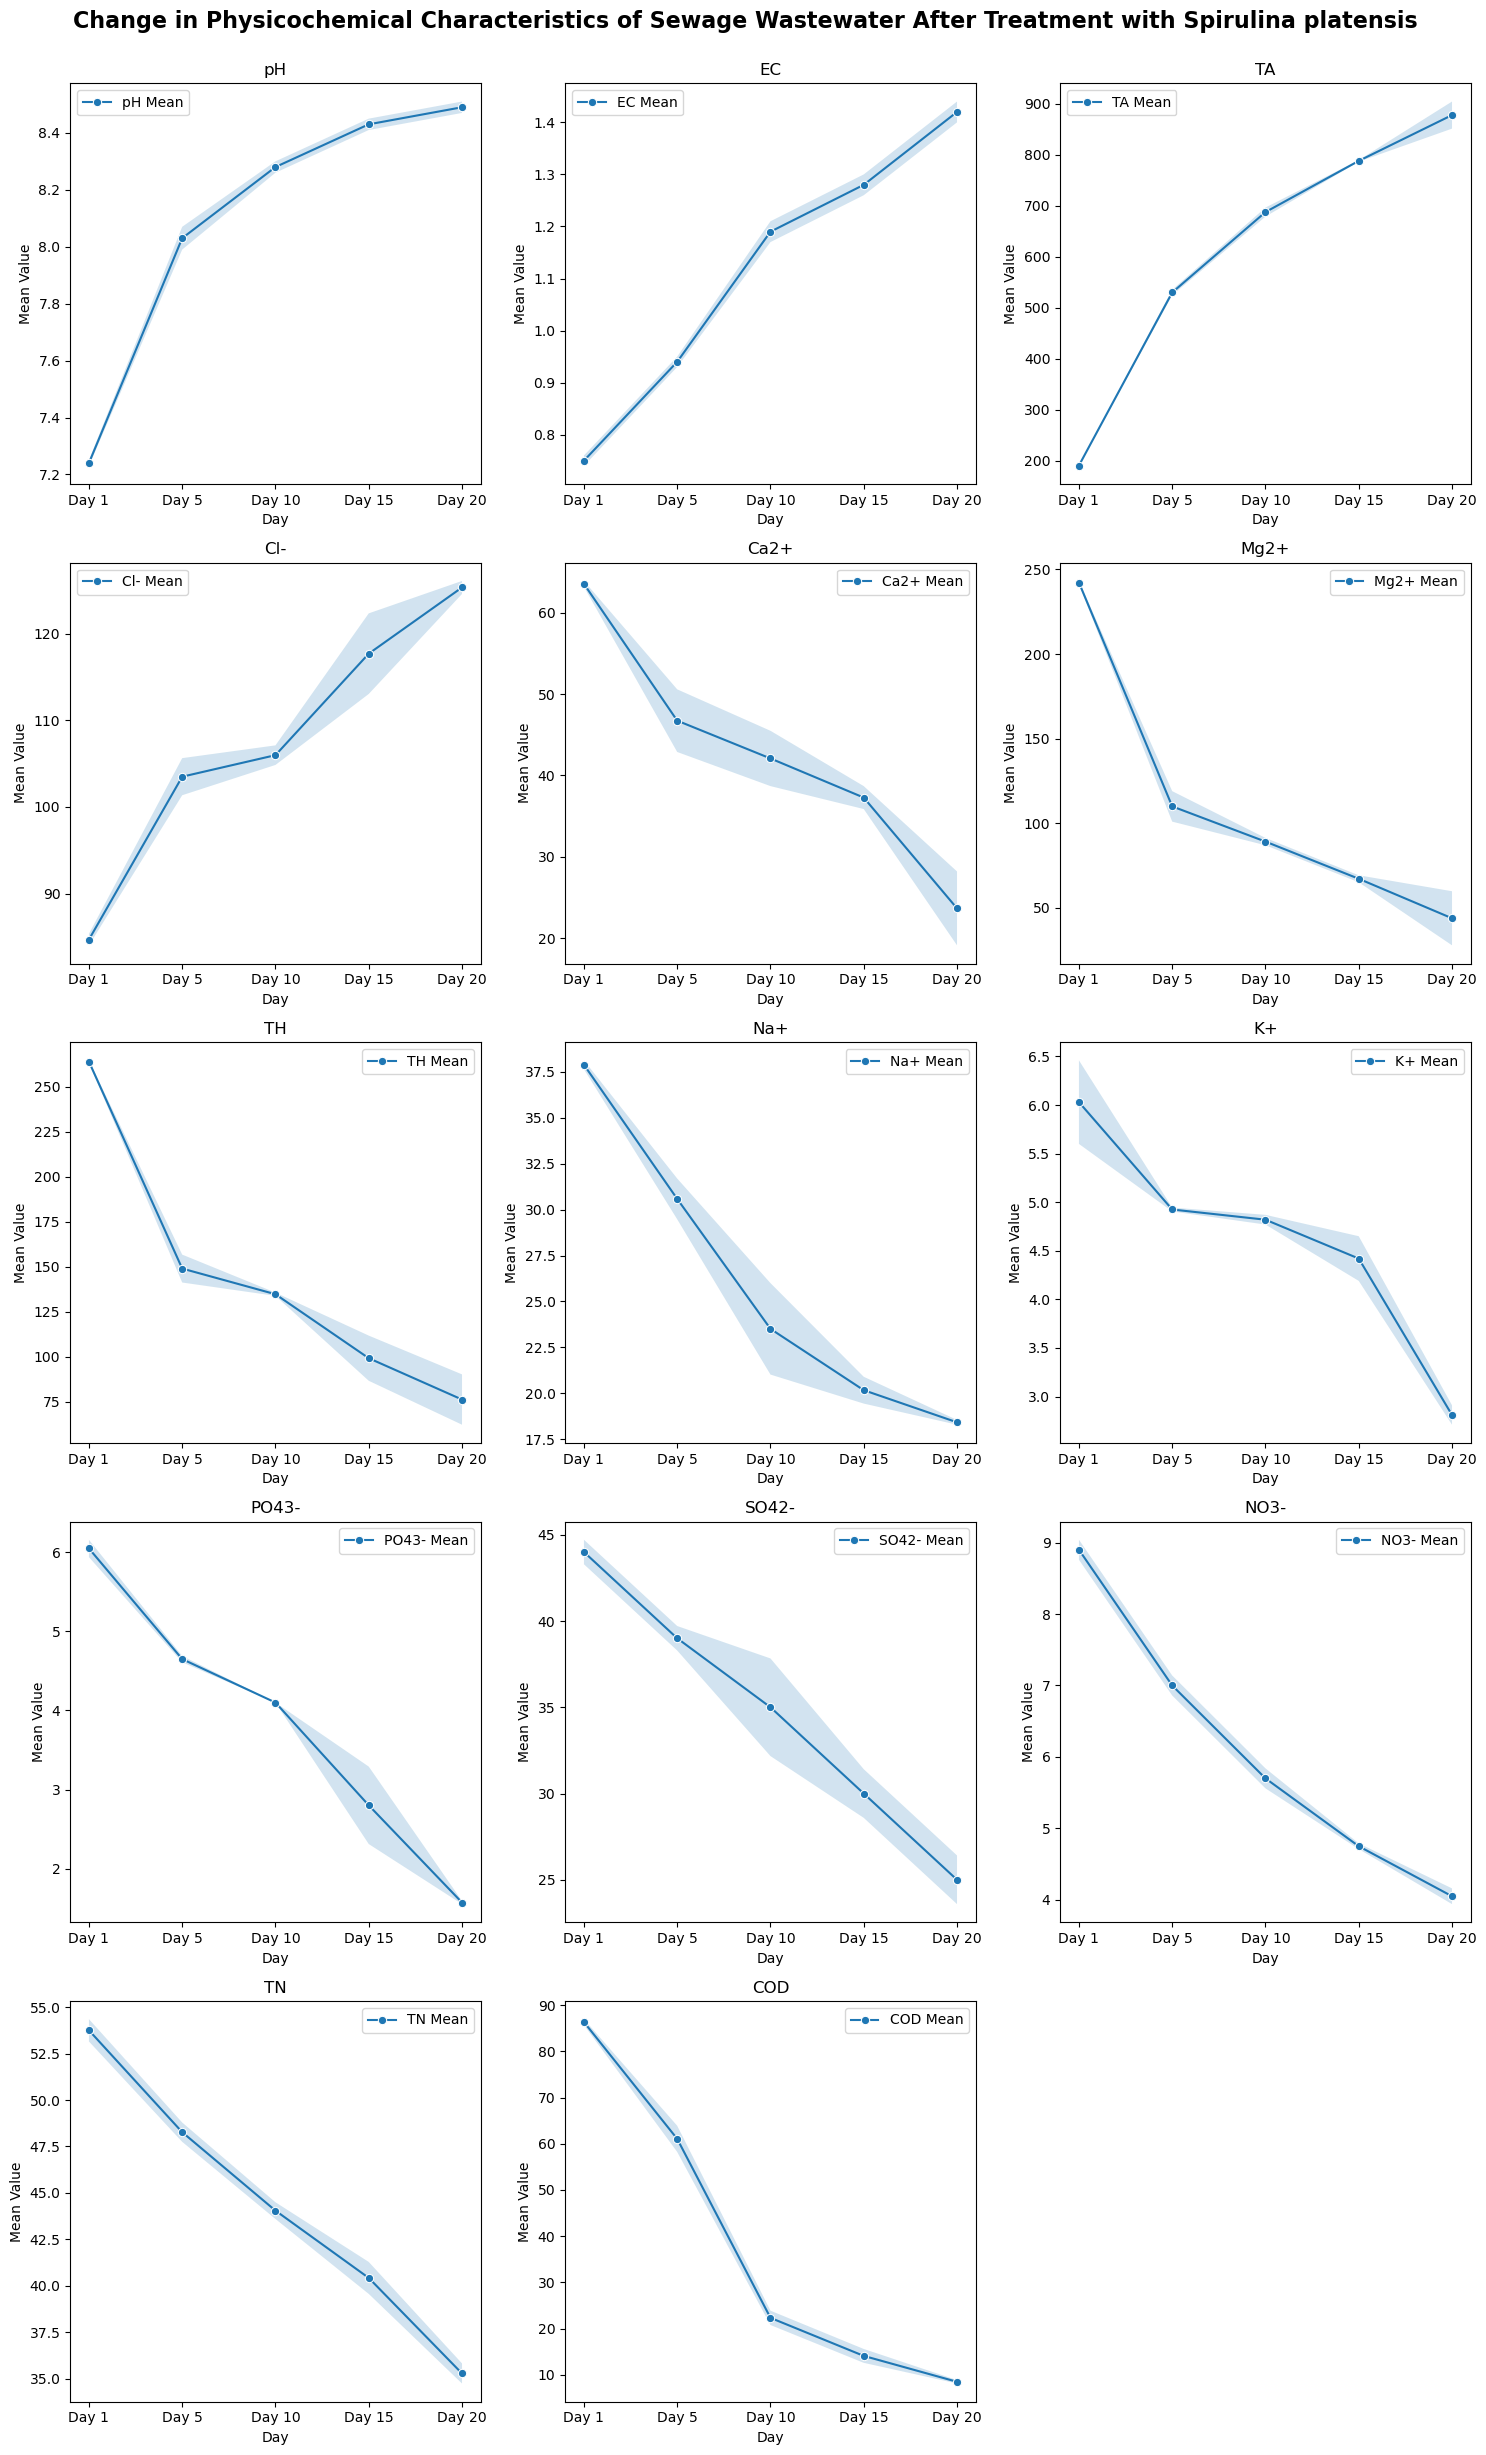

In [7]:
 # Plot: Lineplot
num_parameters = treatment_melted["Parameters"].nunique()
rows = (num_parameters // 3) + (1 if num_parameters % 3 != 0 else 0)

plt.figure(figsize=(15, rows * 5))

# Plotting each parameter
for i, parameter in enumerate(treatment_melted["Parameters"].unique()):
    plt.subplot(rows, 3, i + 1)
    
    # Filter data for each parameter
    parameter_data = treatment_melted[treatment_melted["Parameters"] == parameter]
    
    # Line plot for the Mean
    sns.lineplot(data=parameter_data, x="Day", y="Mean", marker='o', label=f"{parameter} Mean")
        
    # Std as a shaded area for uncertainty
    plt.fill_between(parameter_data["Day"], parameter_data["Mean"] - parameter_data["Std"], 
                     parameter_data["Mean"] + parameter_data["Std"], alpha=0.2)

    plt.title(parameter)
    plt.xlabel("Day")
    plt.ylabel("Mean Value")
    plt.legend()

# Overall title
plt.suptitle("Change in Physicochemical Characteristics of Sewage Wastewater After Treatment with Spirulina platensis", 
             fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.98])  

# Save the figure
plt.savefig("Change in Physicochemical Characteristics in Sewage Wastewater - After Treatment.png", dpi=300)

plt.show()

## **3. Control Results:**

In [8]:
# Melt the data

control_melted = control.melt(id_vars=["Parameters"], var_name="Day", value_name="Measurement")
control_melted

,Parameters,Day,Measurement
0,pH,Day 1,7.24±0.01
1,EC,Day 1,0.75±0.01
2,TA,Day 1,191.00±0.71
3,Cl-,Day 1,84.69±0.66
4,Ca2+,Day 1,63.54±0.36
...,...,...,...
65,PO43-,Day 20,2.24±0.07
66,SO42-,Day 20,10.40±0.42
67,NO3-,Day 20,5.05±0.18
68,TN,Day 20,33.68±1.10


In [9]:
# Apply the function to split by the '±' sign
control_melted[["Mean", "Std"]] = control_melted["Measurement"].apply(lambda x: pd.Series(separate_mean_std(x)))

control_melted

,Parameters,Day,Measurement,Mean,Std
0,pH,Day 1,7.24±0.01,7.24,0.01
1,EC,Day 1,0.75±0.01,0.75,0.01
2,TA,Day 1,191.00±0.71,191.00,0.71
3,Cl-,Day 1,84.69±0.66,84.69,0.66
4,Ca2+,Day 1,63.54±0.36,63.54,0.36
...,...,...,...,...,...
65,PO43-,Day 20,2.24±0.07,2.24,0.07
66,SO42-,Day 20,10.40±0.42,10.40,0.42
67,NO3-,Day 20,5.05±0.18,5.05,0.18
68,TN,Day 20,33.68±1.10,33.68,1.10


In [10]:
# Validation: Check nulls

control_melted.isna().sum()

Parameters     0
Day            0
Measurement    0
Mean           0
Std            0
dtype: int64

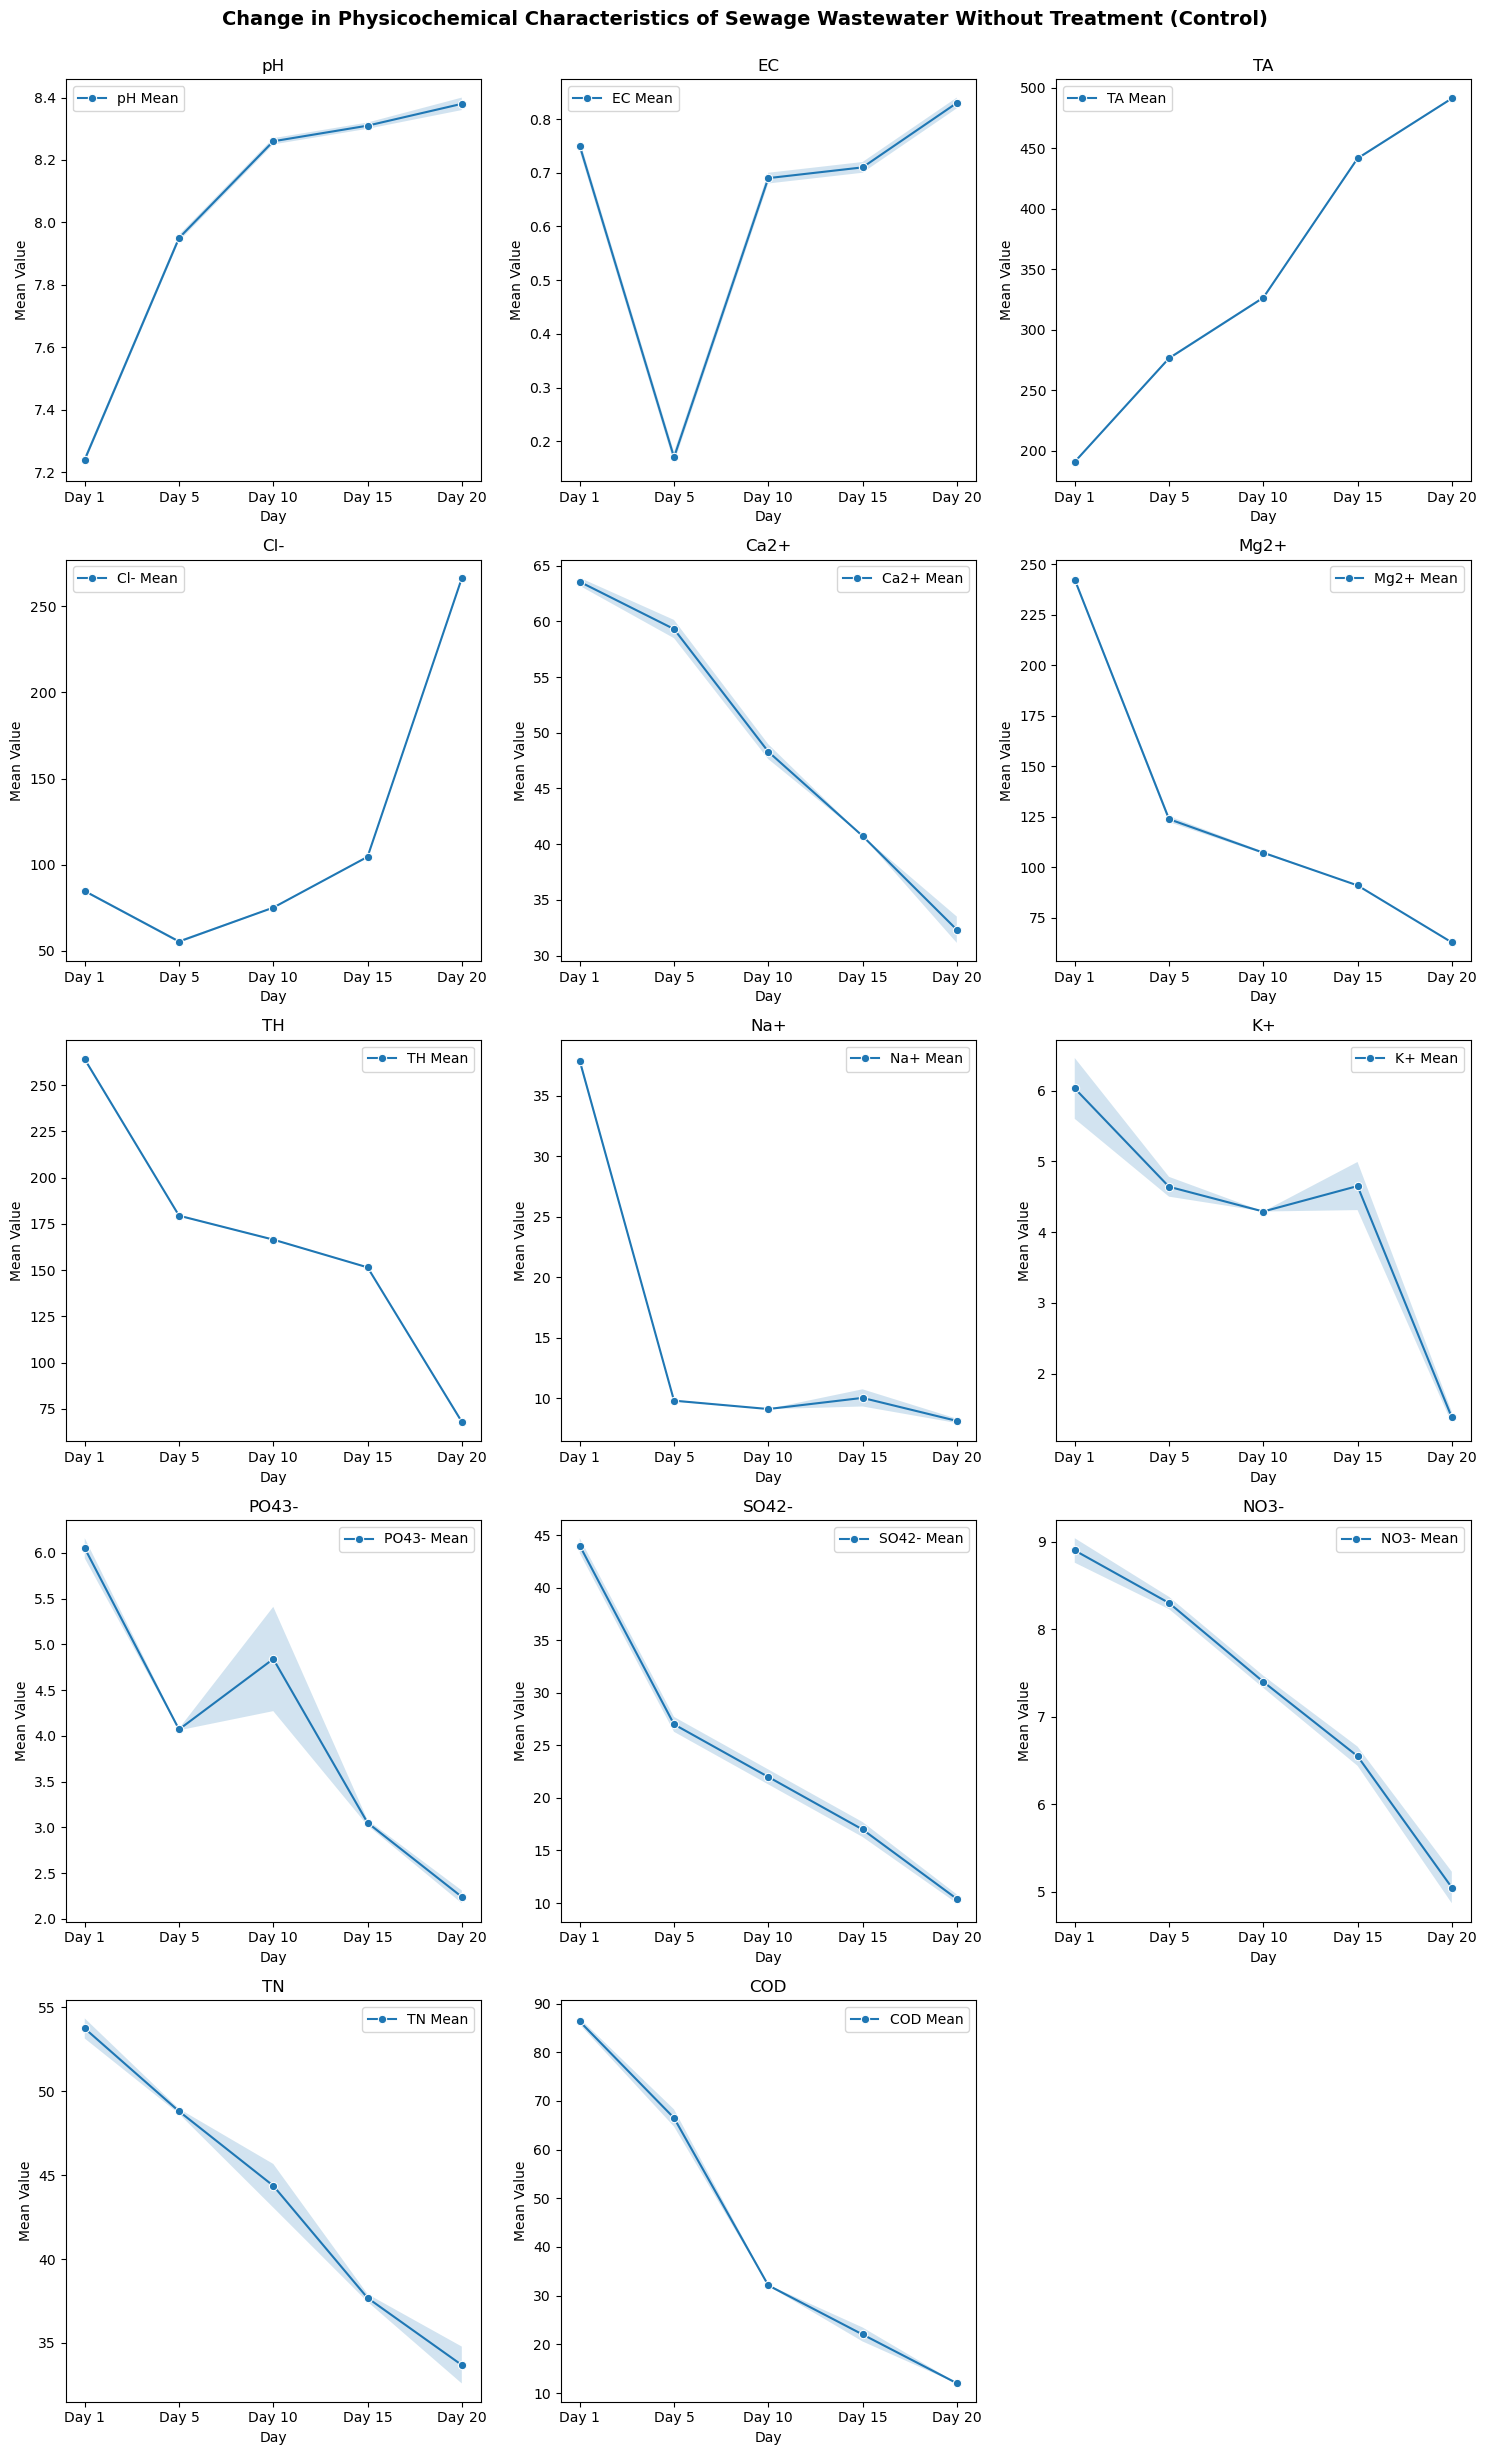

In [11]:
 # Plot: Lineplot: Control Group

num_parameters = control_melted["Parameters"].nunique()
rows = (num_parameters // 3) + (1 if num_parameters % 3 != 0 else 0)

plt.figure(figsize=(15, rows * 5))

# Plotting each parameter
for i, parameter in enumerate(control_melted["Parameters"].unique()):
    plt.subplot(rows, 3, i + 1)
    
    # Filter data for each parameter
    parameter_data = control_melted[control_melted["Parameters"] == parameter]
    
    # Line plot for the Mean
    sns.lineplot(data=parameter_data, 
                 x="Day", y="Mean", 
                 marker='o', 
                 label=f"{parameter} Mean")
        
    # Std as a shaded area for uncertainty
    plt.fill_between(parameter_data["Day"], parameter_data["Mean"] - parameter_data["Std"], 
                     parameter_data["Mean"] + parameter_data["Std"], alpha=0.2)

    plt.title(parameter)
    plt.xlabel("Day")
    plt.ylabel("Mean Value")
    plt.legend()

# Overall title
plt.suptitle("Change in Physicochemical Characteristics of Sewage Wastewater Without Treatment (Control)", 
             fontsize=14, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.98])  

# Save the figure
plt.savefig("Change in Physicochemical Characteristics in Sewage Wastewater - Control.png", dpi=300)

plt.show()

# **4. Plot Treatment and Control results together**

In [12]:
# Merge the datasets on 'Parameters' and 'Day'
merged_data = pd.merge(treatment_melted, control_melted, on=["Parameters", "Day"], 
                       suffixes=('_treatment', '_control'))

# Check the result
merged_data

,Parameters,Day,Measurement_treatment,Mean_treatment,Std_treatment,Measurement_control,Mean_control,Std_control
0,pH,Day 1,7.24±0.01,7.24,0.01,7.24±0.01,7.24,0.01
1,EC,Day 1,0.75±0.01,0.75,0.01,0.75±0.01,0.75,0.01
2,TA,Day 1,191.00±0.71,191.00,0.71,191.00±0.71,191.00,0.71
3,Cl-,Day 1,84.69±0.66,84.69,0.66,84.69±0.66,84.69,0.66
4,Ca2+,Day 1,63.54±0.36,63.54,0.36,63.54±0.36,63.54,0.36
...,...,...,...,...,...,...,...,...
65,PO43-,Day 20,1.57±0.02,1.57,0.02,2.24±0.07,2.24,0.07
66,SO42-,Day 20,25.00±1.41,25.00,1.41,10.40±0.42,10.40,0.42
67,NO3-,Day 20,4.05±0.11,4.05,0.11,5.05±0.18,5.05,0.18
68,TN,Day 20,35.29±0.54,35.29,0.54,33.68±1.10,33.68,1.10


In [13]:
# Validation: Check nulls

merged_data.isna().sum()

Parameters               0
Day                      0
Measurement_treatment    0
Mean_treatment           0
Std_treatment            0
Measurement_control      0
Mean_control             0
Std_control              0
dtype: int64

### **Note:** Add SI units of parameters as parameters:
- We want these SI units to be present in the visualization

In [14]:
# Create dictionary of SI units to map them with parameters

parameters_with_units = {"pH": "pH",
                         "EC": "EC (µS/cm)",
                         "Cl-": "Cl- (mg/l)",
                         "TA": "TA (mg/l)",
                         "Ca2+": "Ca2+ (mg/l)",
                         "Mg2+": "Mg2+ (mg/l)",
                         "TH": "TH (mg/l)",
                         "Na+": "Na+ (mg/l)",
                         "K+": "K+ (mg/l)", 
                         "SO42-": "SO42- (mg/l)", 
                         "PO43-": "PO43- (mg/l)", 
                         "NO3-": "NO3- (mg/l)", 
                         "TN": "TN (mg/l)", 
                         "COD": "COD (mg/l)"}

# Map Parameters column to include units and rename the column
merged_data["Parameters"] = merged_data["Parameters"].map(parameters_with_units)
merged_data

,Parameters,Day,Measurement_treatment,Mean_treatment,Std_treatment,Measurement_control,Mean_control,Std_control
0,pH,Day 1,7.24±0.01,7.24,0.01,7.24±0.01,7.24,0.01
1,EC (µS/cm),Day 1,0.75±0.01,0.75,0.01,0.75±0.01,0.75,0.01
2,TA (mg/l),Day 1,191.00±0.71,191.00,0.71,191.00±0.71,191.00,0.71
3,Cl- (mg/l),Day 1,84.69±0.66,84.69,0.66,84.69±0.66,84.69,0.66
4,Ca2+ (mg/l),Day 1,63.54±0.36,63.54,0.36,63.54±0.36,63.54,0.36
...,...,...,...,...,...,...,...,...
65,PO43- (mg/l),Day 20,1.57±0.02,1.57,0.02,2.24±0.07,2.24,0.07
66,SO42- (mg/l),Day 20,25.00±1.41,25.00,1.41,10.40±0.42,10.40,0.42
67,NO3- (mg/l),Day 20,4.05±0.11,4.05,0.11,5.05±0.18,5.05,0.18
68,TN (mg/l),Day 20,35.29±0.54,35.29,0.54,33.68±1.10,33.68,1.10


In [15]:
# Validation: Check nulls

merged_data.isna().sum()

Parameters               0
Day                      0
Measurement_treatment    0
Mean_treatment           0
Std_treatment            0
Measurement_control      0
Mean_control             0
Std_control              0
dtype: int64

### **4.1 Lineplot with fill:** Combined data of treatment and control results

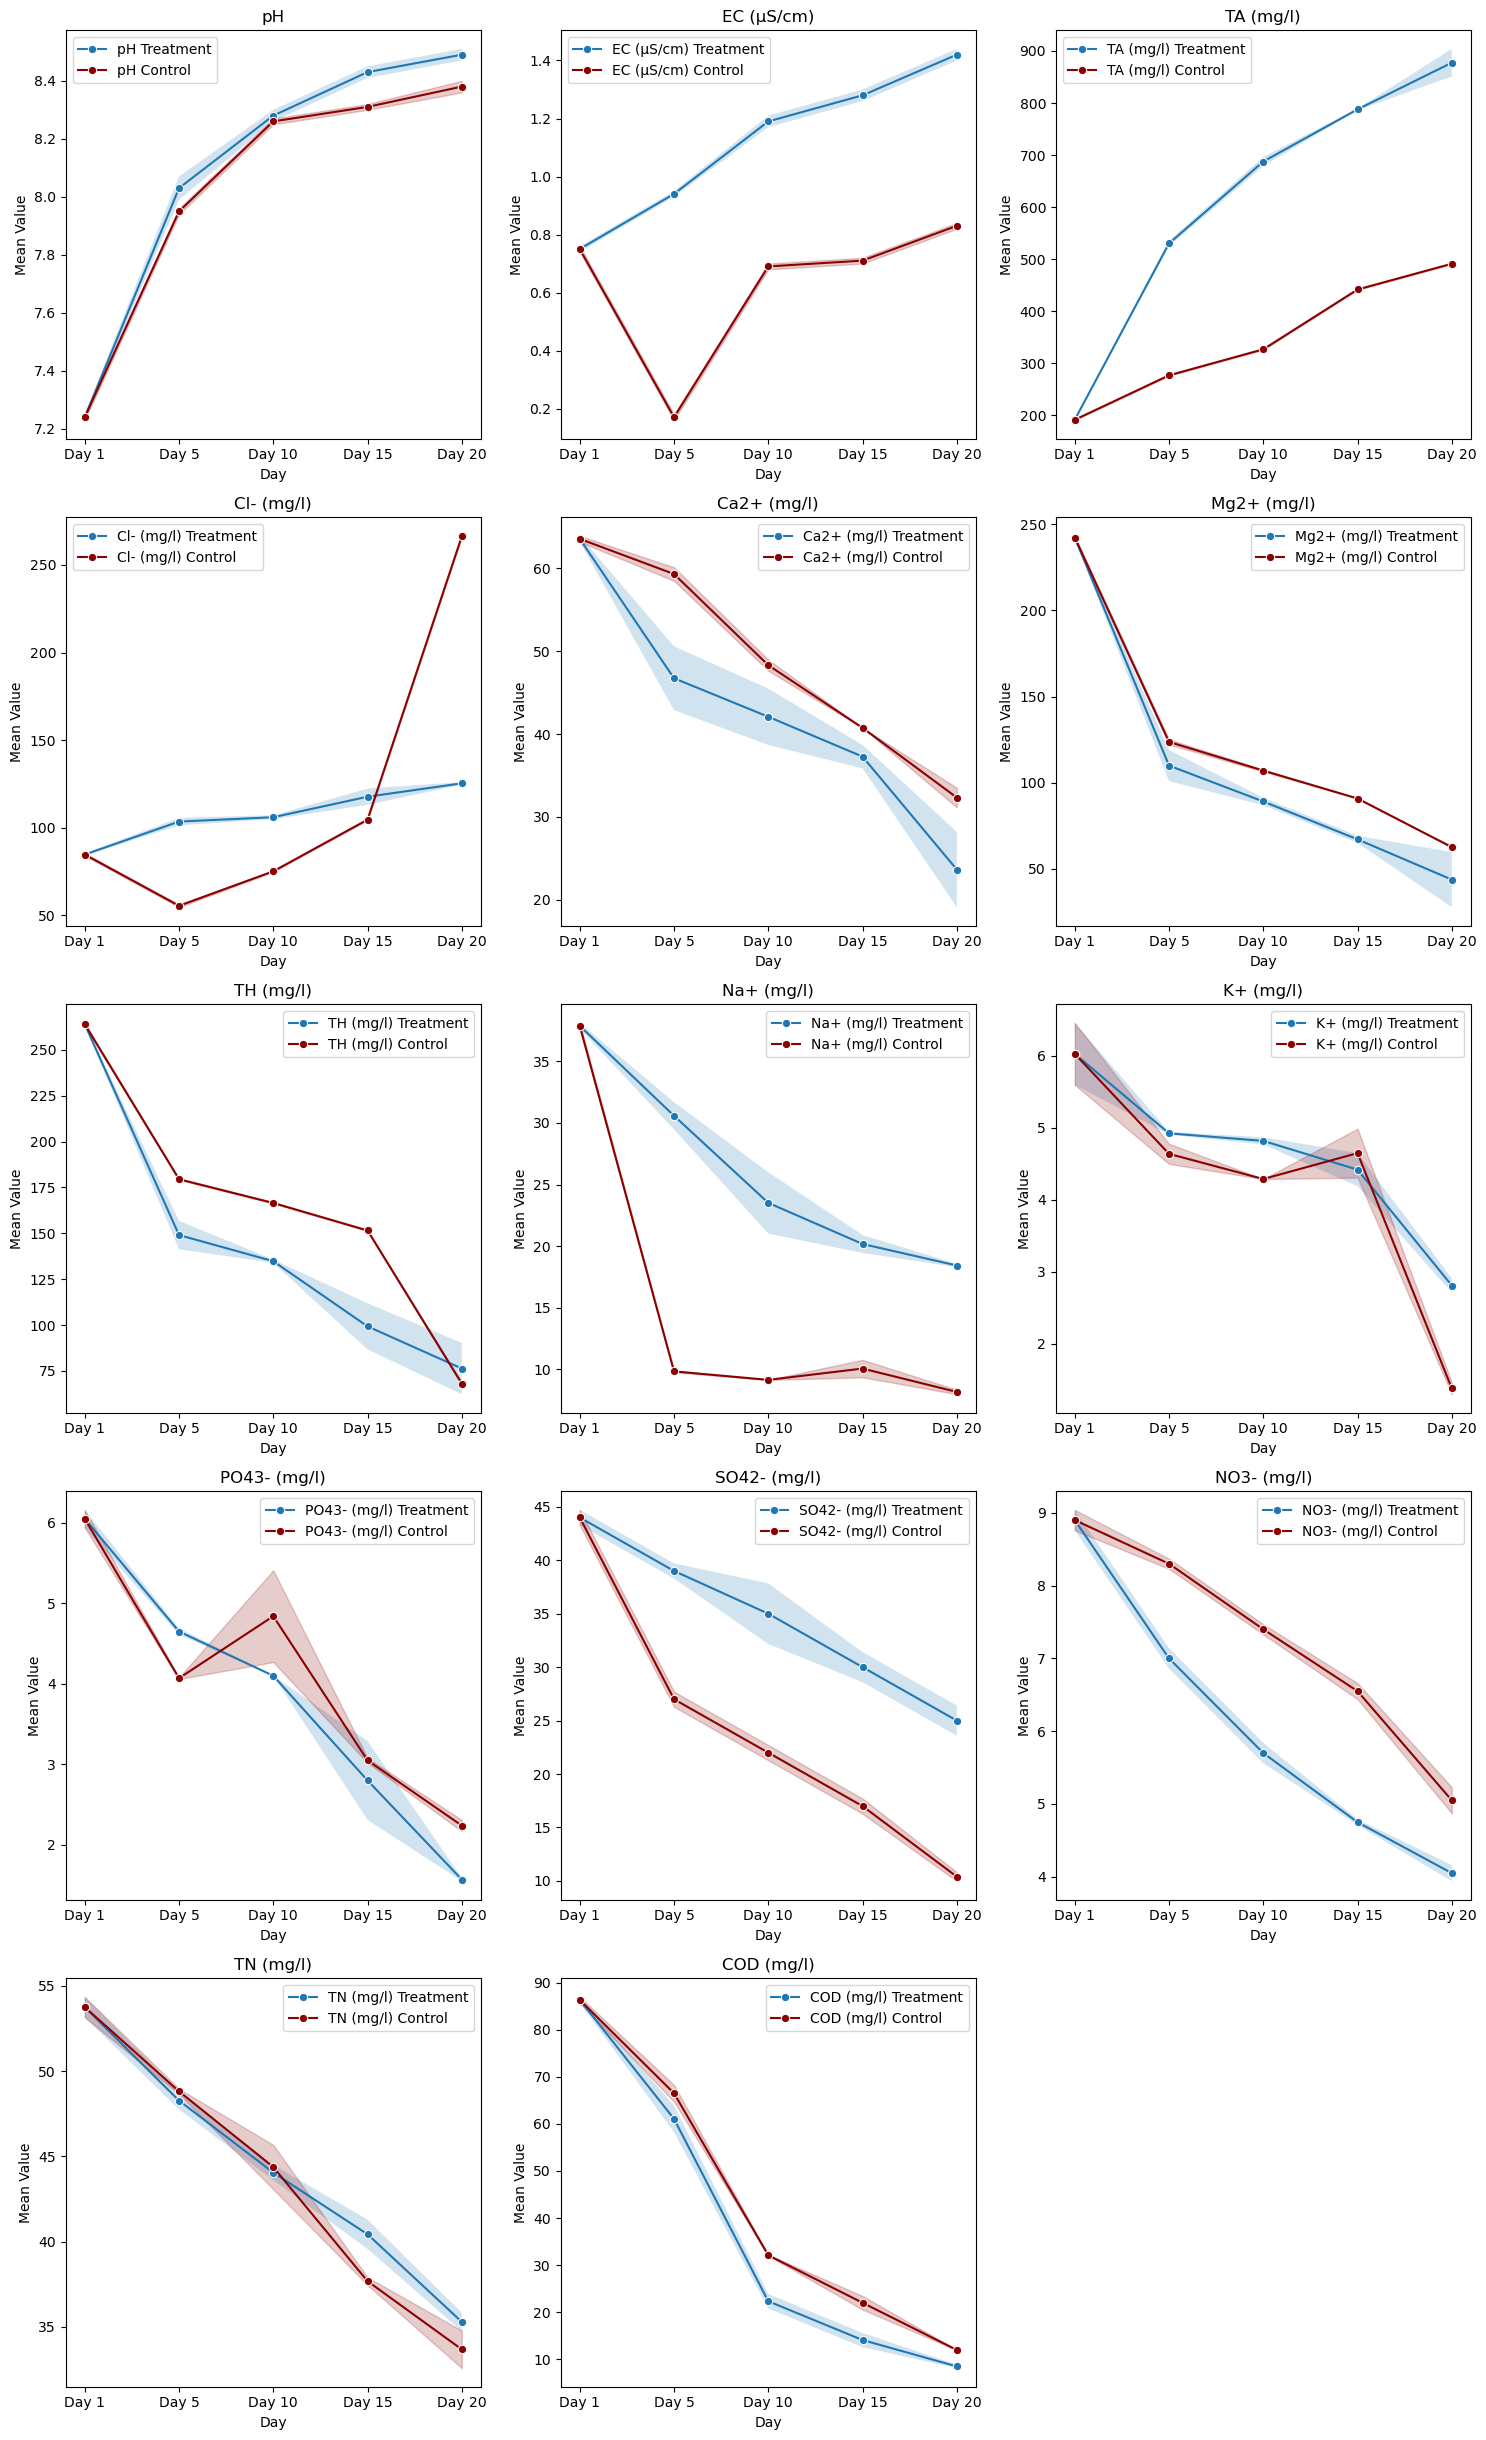

In [16]:
# Visuaization;

num_parameters = merged_data["Parameters"].nunique()
rows = (num_parameters // 3) + (1 if num_parameters % 3 != 0 else 0)
plt.figure(figsize=(15, rows * 5))

# Plot: Lineplot
for i, parameter in enumerate(merged_data["Parameters"].unique()):
    plt.subplot(rows, 3, i + 1)

    parameter_data = merged_data[merged_data["Parameters"] == parameter]
    
    # Treatment line
    sns.lineplot(data=parameter_data, x="Day", y="Mean_treatment", marker='o', label=f"{parameter} Treatment")
    # Control line
    sns.lineplot(data=parameter_data, x="Day", y="Mean_control", marker='o', label=f"{parameter} Control", color="darkred")

    # std shaded area (Treatment)
    plt.fill_between(parameter_data["Day"], 
                     parameter_data["Mean_treatment"] - parameter_data["Std_treatment"], 
                     parameter_data["Mean_treatment"] + parameter_data["Std_treatment"], 
                     alpha=0.2)
    
    # Std shaded area for (control)
    plt.fill_between(parameter_data["Day"], 
                     parameter_data["Mean_control"] - parameter_data["Std_control"], 
                     parameter_data["Mean_control"] + parameter_data["Std_control"], 
                     color="darkred", alpha=0.2)
    
    plt.title(parameter)
    plt.xlabel("Day")
    plt.ylabel("Mean Value")
    plt.legend()

# Prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.98])

plt.savefig("Lineplot with fill- Change in Physicochemical Characteristics (Treatment vs. Control).png", dpi=300)

plt.show()

### **4.2 Error Plot:** Combined data of treatment and control results

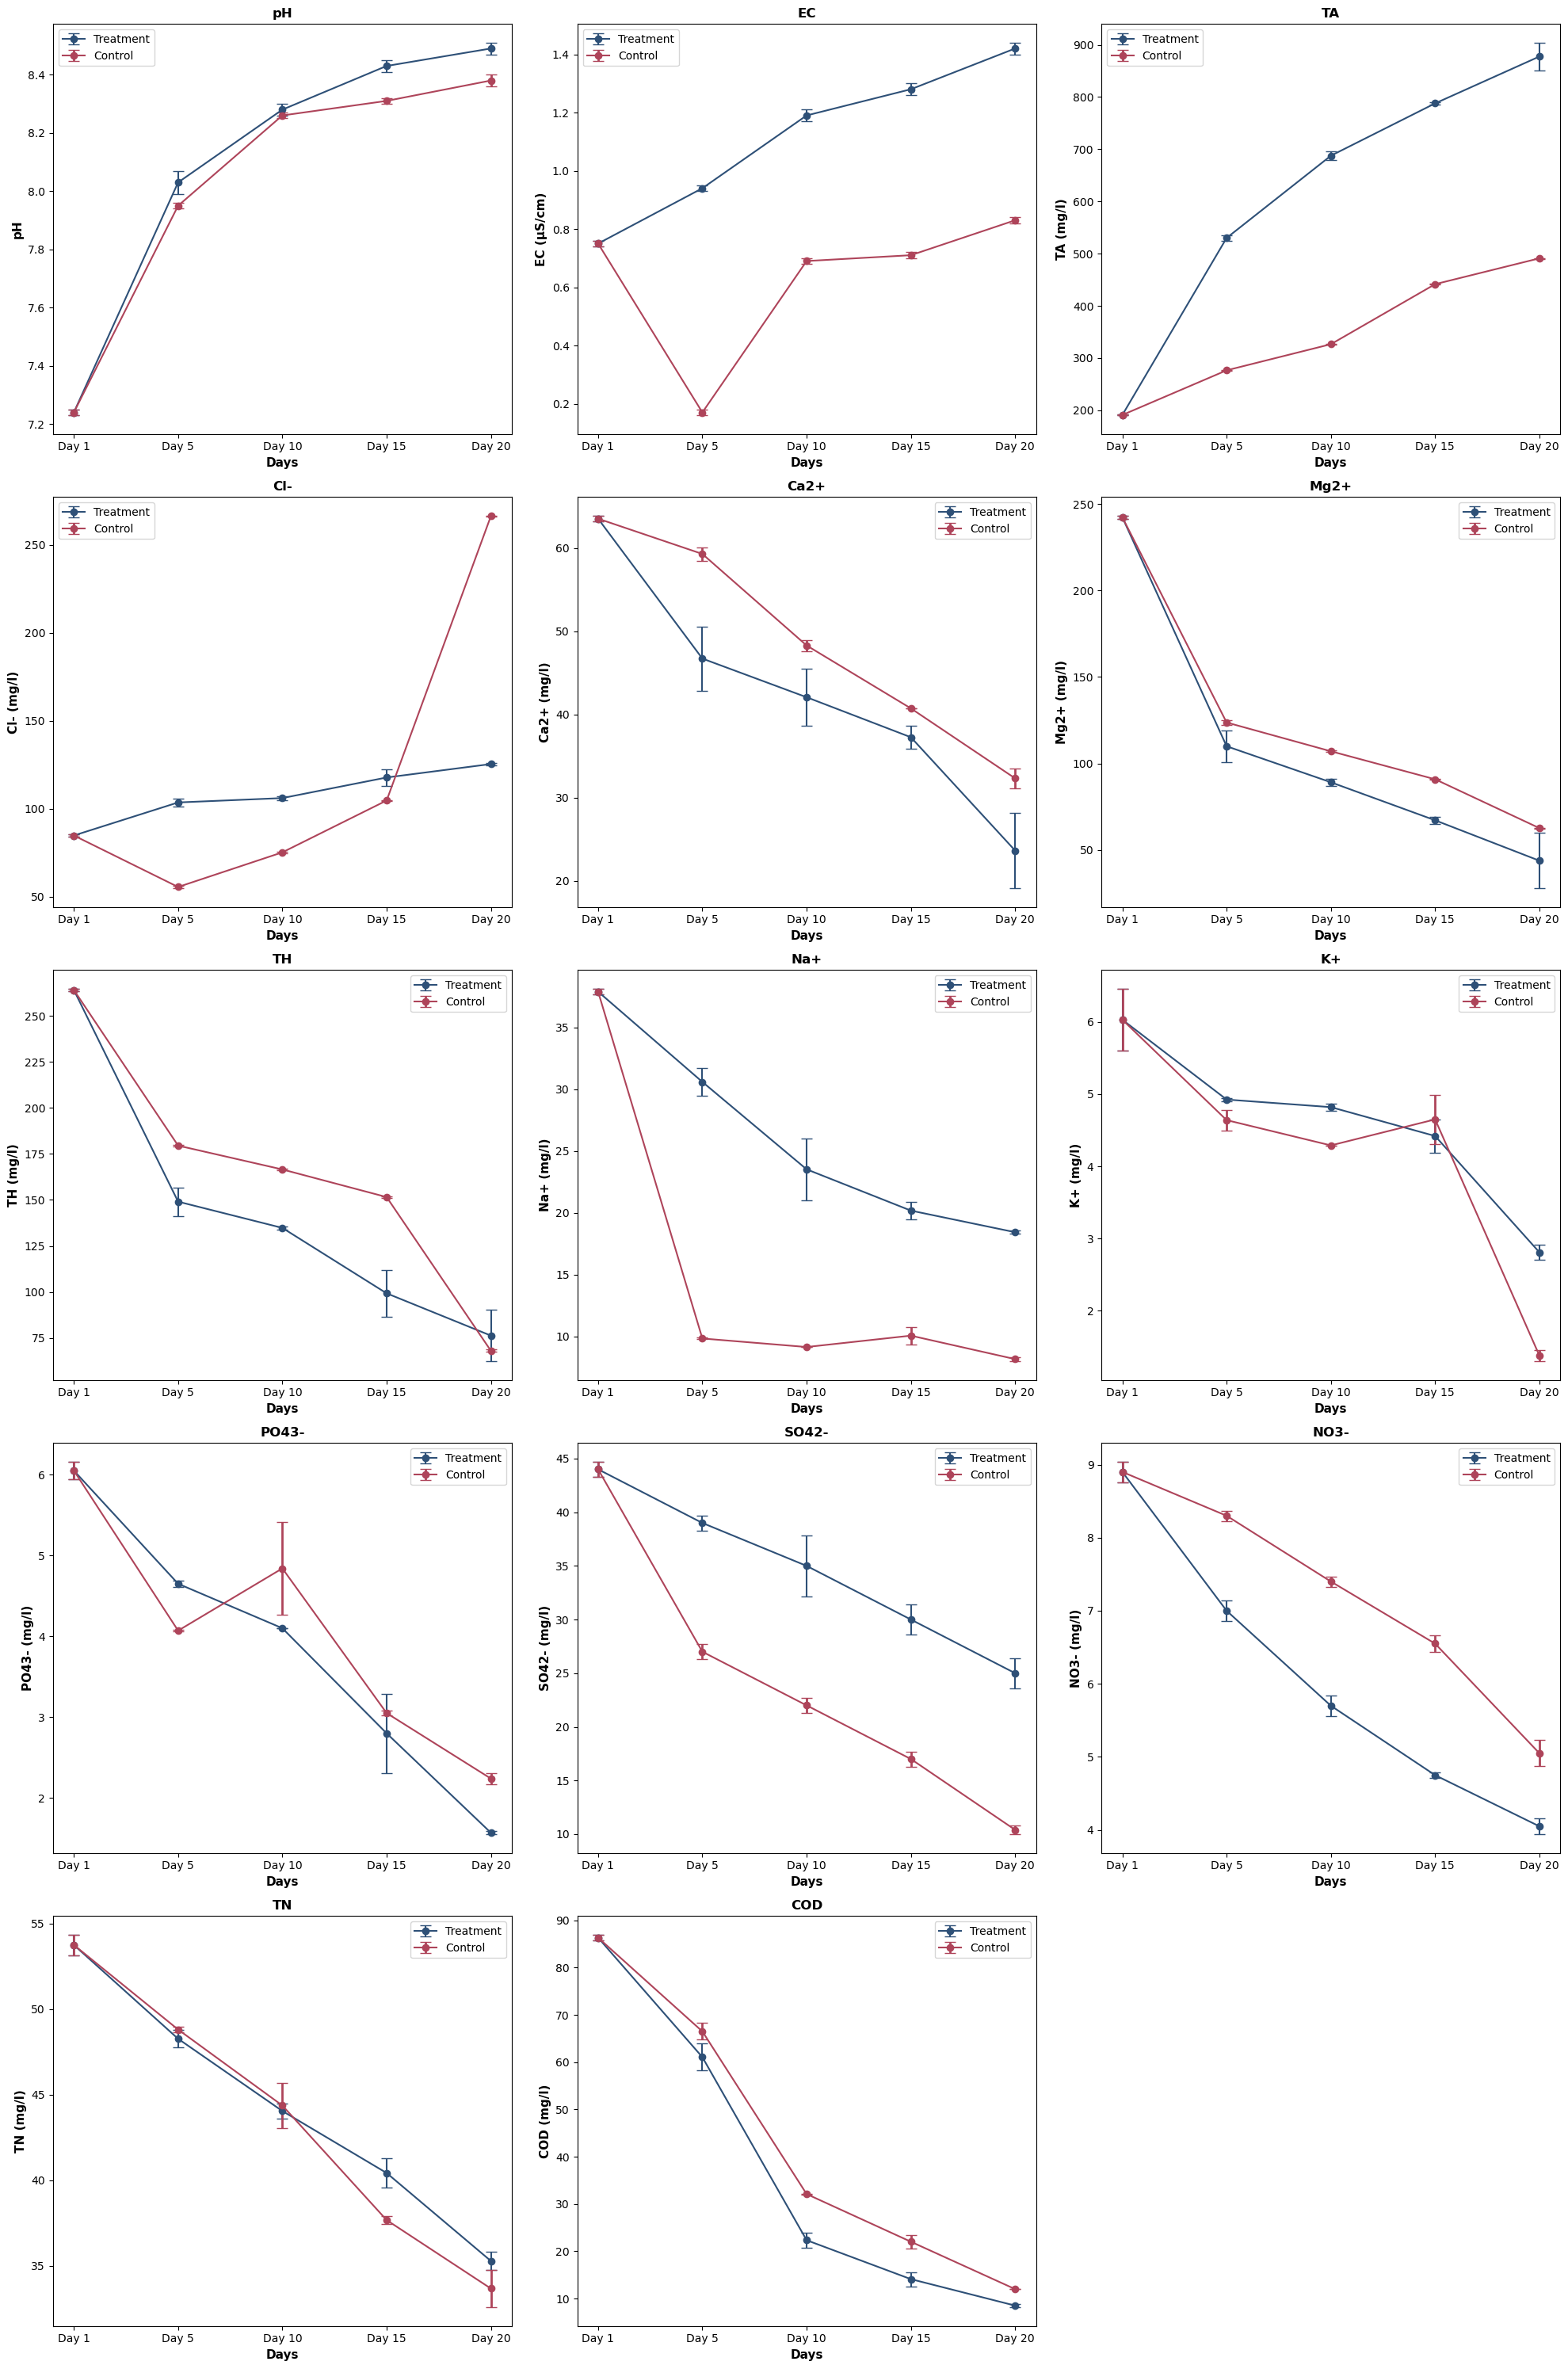

In [17]:
# Error Plot: Merged Data

num_parameters = merged_data["Parameters"].nunique()
rows = (num_parameters // 3) + (1 if num_parameters % 3 != 0 else 0)

plt.figure(figsize=(20, rows * 6))

# Iterate through parameters:
for i, parameter in enumerate(merged_data['Parameters'].unique()):
    plt.subplot(rows, 3, i + 1)

    # Data for the respective parameter
    parameter_data = merged_data[merged_data["Parameters"] == parameter]
    
    # Treatment Plot:
    plt.errorbar(parameter_data["Day"], parameter_data["Mean_treatment"], 
                 yerr=parameter_data["Std_treatment"], 
                 fmt='o-', label="Treatment",
                 capsize=5,
                 color='#2E5077',
                 ecolor='#2E5077',
                 elinewidth=1.5)
    
    # Control plot:
    plt.errorbar(parameter_data["Day"], parameter_data["Mean_control"], 
                 yerr=parameter_data["Std_control"], 
                 fmt='o-', 
                 label="Control", 
                 capsize=5, 
                 color='#AE445A',
                 ecolor='#AE445A',
                 elinewidth=2)
    
    plt.ylabel(parameter, fontweight='bold', fontsize= 11)
    plt.xlabel("Days", fontweight='bold', fontsize= 11)
    plt.title(parameter.split(' ')[0], fontweight='bold', fontsize= 12)


    # # Title inside the plot
    # plt.text(0.5, 0.97, chr(65 + i), transform=plt.gca().transAxes, 
    #          fontsize=14, fontweight='bold', ha='center', va='center',
    #          bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    plt.legend()

    plt.subplots_adjust(wspace=1, hspace=5)

plt.tight_layout()
plt.savefig("Errorplot- Change in Physicochemical Characteristics (Treatment vs. Control).png", dpi=300)

plt.show()

# **5. Data: Results Before and After Treatment**

In [18]:
results_before = pd.read_excel("sewage_treatment_results.xlsx", sheet_name= "results_before")
results_after = pd.read_excel("sewage_treatment_results.xlsx", sheet_name= "results_after")

### **5.1 Results Before**

In [19]:
# Combine row [0] and [1] to create header and replace header
results_before.columns = results_before.iloc[0] + "_" + results_before.iloc[1].fillna("")
results_before = results_before.drop(index=[0, 1]).reset_index(drop=True)

# remove "_" from headers
results_before.columns = results_before.columns.str.replace("_", " ").str.strip()

# Drop last row as it is total row
results_before.drop(index= [15], inplace= True)
results_before

,Element,AN,Series,Unn. C [wt.%],Norm. c [wt. %],Atom. C [at. %],Error,(1 Sigma) [wt. %]
0,O,8,K-series,44.35,37.77,37.69,NaN,8.09
1,C,6,K-series,41.97,35.75,47.51,NaN,7.71
2,N,7,K-series,5.54,4.72,5.37,NaN,2.5
3,Sb,51,L- series,5,4.26,0.56,NaN,0.49
4,Si,14,K-series,4.5,3.83,2.18,NaN,0.34
5,Ca,20,K-series,3.8,3.23,1.29,NaN,0.37
6,Zn,30,L- series,3.2,2.72,0.67,NaN,0.38
7,Na,11,K-series,2.09,1.78,1.24,NaN,0.25
8,Al,13,K-series,1.8,1.53,0.9,NaN,0.19
9,P,15,K-series,1.73,1.48,0.76,NaN,0.18


### **5.2 Results After**

In [20]:
# Combine row [0] and [1] to create header and replace header

results_after.columns = results_after.iloc[0] + " " + results_after.iloc[1].fillna("")
results_after = results_after.drop(index=[0, 1]).reset_index(drop=True)

# remove "_" from headers
results_after.columns = results_after.columns.str.replace("_", " ").str.strip()

# Drop last row as it is total row
results_after.drop(index= [14], inplace= True)
results_after

,Element,AN,Series,Unn. C [wt.%],Norm. c [wt. %],Atom. C [at. %],Error,(1 Sigma) [wt. %]
0,C,6,K- series,39.03,39.3,50.59,NaN,5.9
1,O,8,K- series,35.57,35.81,34.61,NaN,5.51
2,N,7,K- series,5.51,5.55,6.12,NaN,1.72
3,Si,14,K- series,5.07,5.1,2.81,NaN,0.29
4,Sb,51,L- series,3.74,3.76,0.48,NaN,0.29
5,Ca,20,K- series,2.08,2.09,0.81,NaN,0.18
6,Al,13,K- series,1.87,1.88,1.08,NaN,0.15
7,Na,11,K- series,1.49,1.5,1.01,NaN,0.15
8,P,15,K- series,1.15,1.16,0.58,NaN,0.11
9,Mg,12,K- series,1.12,1.13,0.72,NaN,0.12


### **5.3: Cleaning:** Drop irrelevant columns for visualization

In [21]:
# Check column names
results_before.columns

Index(['Element', 'AN', 'Series', 'Unn. C [wt.%]', 'Norm. c [wt. %]',
       'Atom. C [at. %]', 'Error', '(1 Sigma) [wt. %]'],
      dtype='object')

In [22]:
# Relevant columns

columns_to_keep = ['Element', 'Unn. C [wt.%]', 'Norm. c [wt. %]', 'Atom. C [at. %]']

# Filter data
results_before = results_before[columns_to_keep]
results_after = results_after[columns_to_keep]

In [23]:
# Merge datasets for comparison

results_comparison = results_before.merge(results_after, on="Element", suffixes=("_Before", "_After"))
results_comparison.columns

Index(['Element', 'Unn. C [wt.%]_Before', 'Norm. c [wt. %]_Before',
       'Atom. C [at. %]_Before', 'Unn. C [wt.%]_After',
       'Norm. c [wt. %]_After', 'Atom. C [at. %]_After'],
      dtype='object')

## **6: Plot 1:** Unnormalized Concentration of Elements Before and After Treatment

In [24]:
results_comparison_melted = results_comparison.melt(id_vars= "Element",
                                                    var_name= "Measurement",
                                                    value_name= "Value")
results_comparison_melted

,Element,Measurement,Value
0,O,Unn. C [wt.%]_Before,44.35
1,C,Unn. C [wt.%]_Before,41.97
2,N,Unn. C [wt.%]_Before,5.54
3,Sb,Unn. C [wt.%]_Before,5
4,Si,Unn. C [wt.%]_Before,4.5
...,...,...,...
79,Mg,Atom. C [at. %]_After,0.72
80,F,Atom. C [at. %]_After,0.2
81,Cl,Atom. C [at. %]_After,0.45
82,S,Atom. C [at. %]_After,0.35


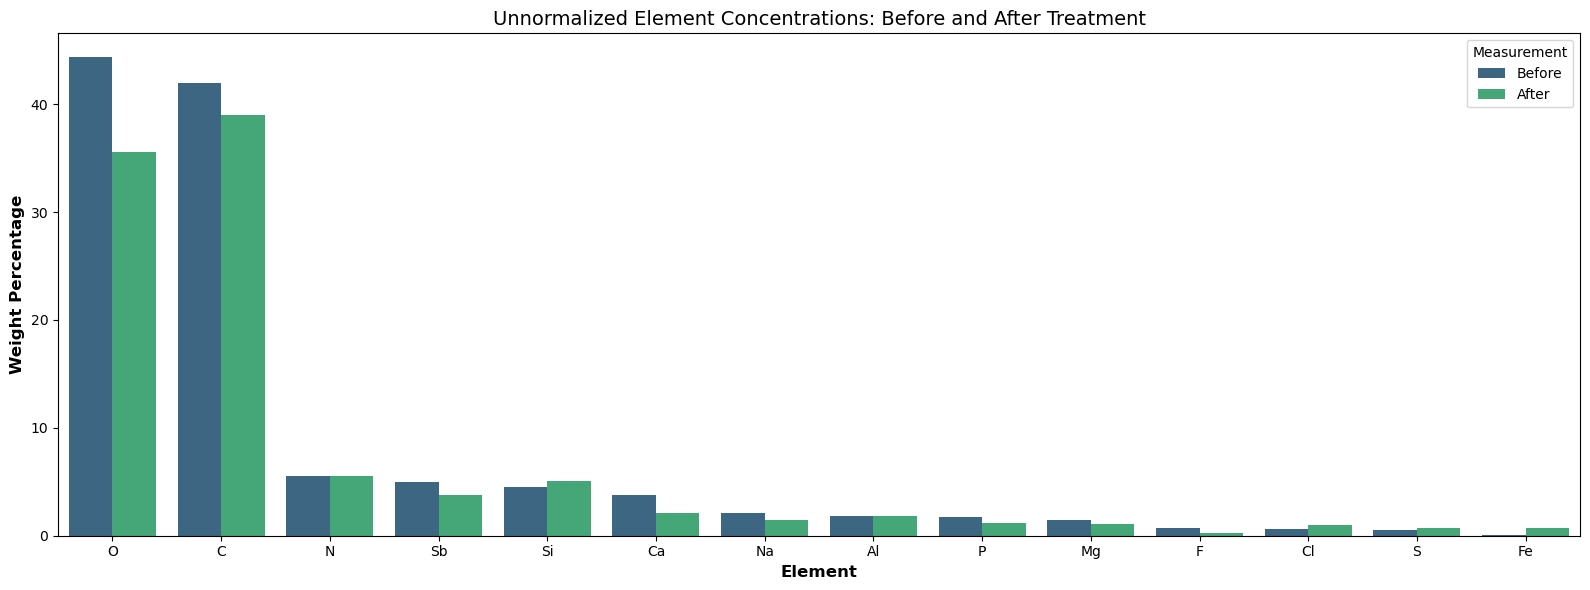

In [32]:
# Filter data
unnormc_results= results_comparison_melted[results_comparison_melted['Measurement'].isin(['Unn. C [wt.%]_Before', 'Unn. C [wt.%]_After'])]

# Plot
plt.figure(figsize=(16, 6))
sns.barplot(data=unnormc_results, 
            x="Element", 
            y="Value", 
            hue="Measurement", 
            palette="viridis")

plt.title("Unnormalized Element Concentrations: Before and After Treatment", fontsize=14)
plt.xlabel("Element", fontweight= 'bold', fontsize= 12)
plt.ylabel("Weight Percentage", fontweight= 'bold', fontsize= 12)

legend = plt.legend(title="Measurement")
legend_labels = ["Before", "After"]
for i, j in zip(legend.get_texts(), legend_labels):
    i.set_text(j)

plt.tight_layout()
plt.savefig("Unnormalized Element Concentrations- Before and After Treatment.png", dpi= 300)
plt.show()

## **6: Plot 2:** Normalized Concentration of Elements Before and After Treatment

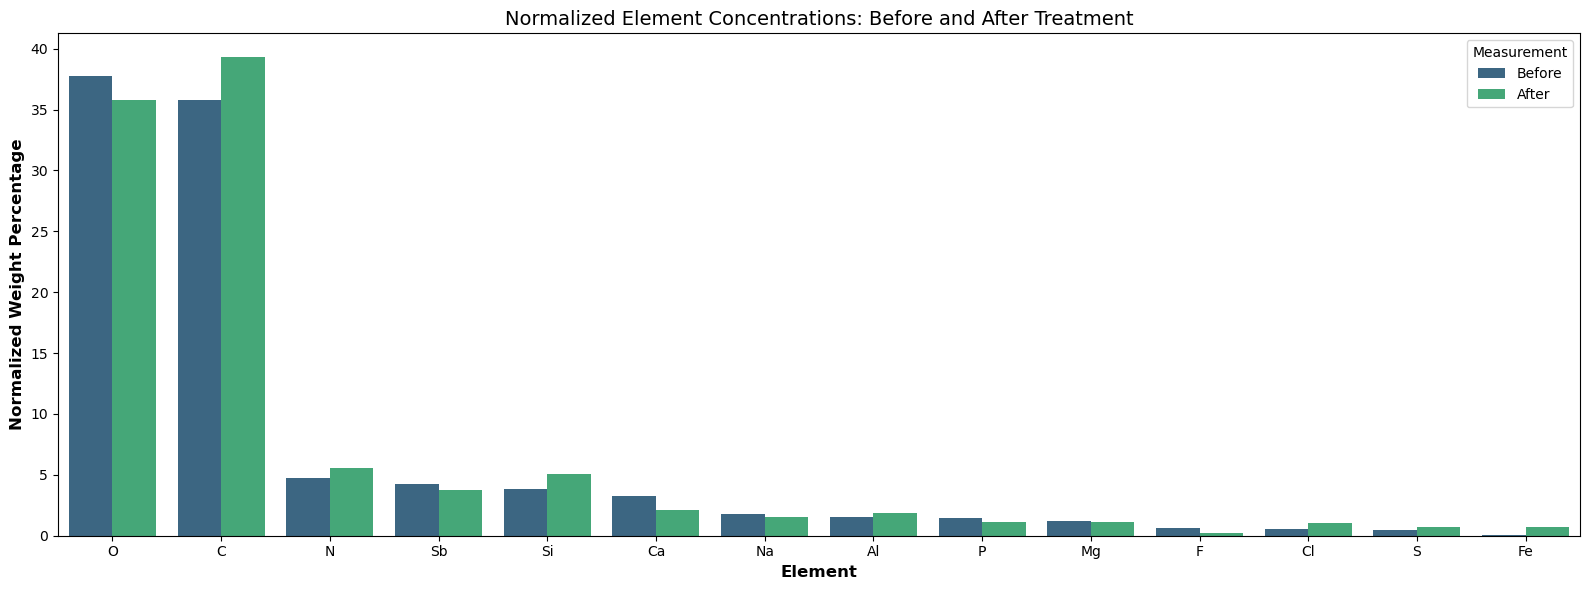

In [33]:
# Filter data
normc_results= results_comparison_melted[results_comparison_melted['Measurement'].isin(['Norm. c [wt. %]_Before', 'Norm. c [wt. %]_After'])]
# Plot
plt.figure(figsize=(16, 6))

sns.barplot(data= normc_results,
            x= 'Element',
            y= 'Value',
            hue= "Measurement",
            palette='viridis')

plt.title("Normalized Element Concentrations: Before and After Treatment", fontsize=14)
plt.xlabel("Element", fontweight= 'bold', fontsize= 12)
plt.ylabel("Normalized Weight Percentage", fontweight= 'bold', fontsize= 12)

legend = plt.legend(title="Measurement")
legend_labels = ["Before", "After"]
for i, j in zip(legend.get_texts(), legend_labels):
    i.set_text(j)

plt.tight_layout()

plt.savefig("Normalized Element Concentrations- Before and After Treatment.png", dpi= 300)
plt.show()


## **6: Plot 3:** Atom Composition Comparison of Elements Before and After Treatment

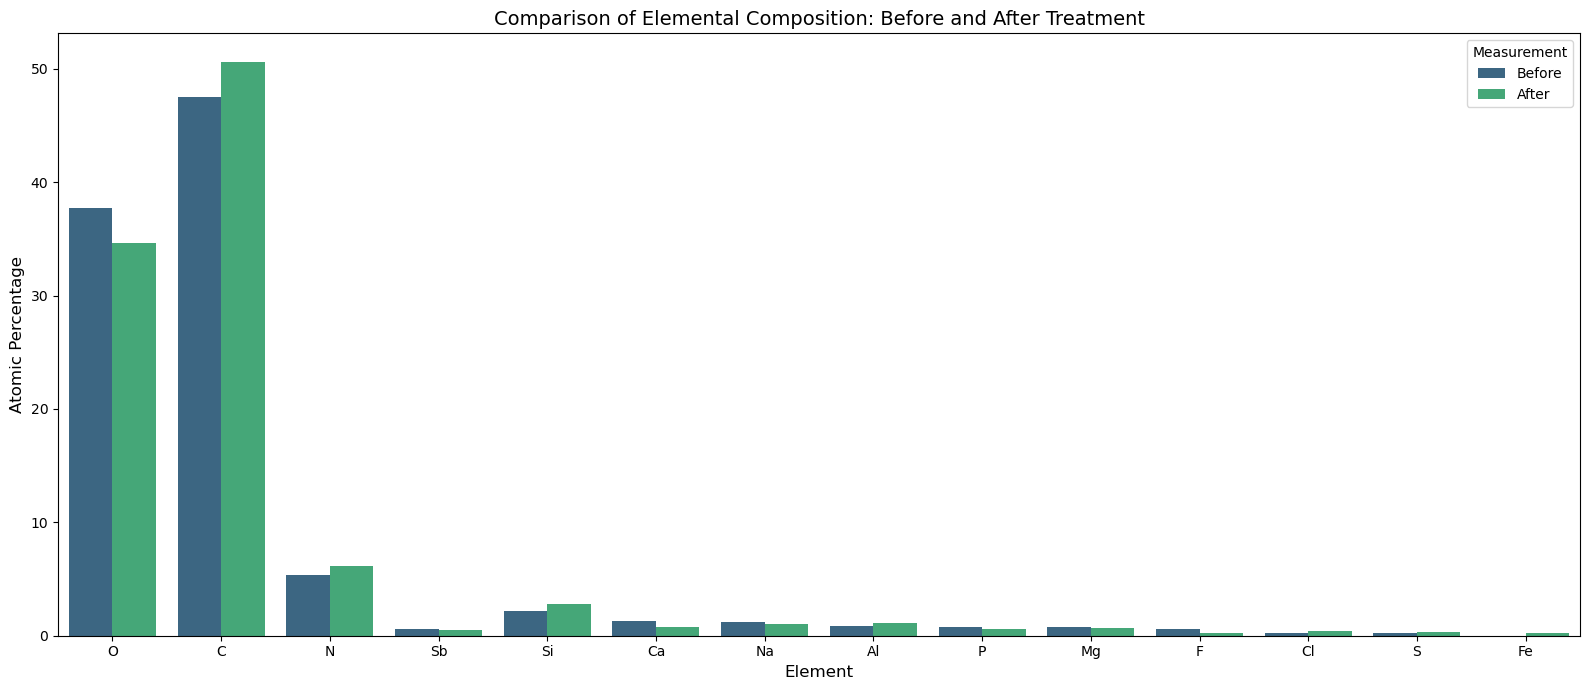

In [34]:
# Filter data
atomc_results= results_comparison_melted[results_comparison_melted['Measurement'].isin(['Atom. C [at. %]_Before', 'Atom. C [at. %]_After'])]

# Plot:

plt.figure(figsize= (16, 7))
sns.barplot(data= atomc_results,
            x= 'Element',
            y= "Value",
            hue= "Measurement",
            palette= "viridis")


plt.title("Comparison of Elemental Composition: Before and After Treatment", fontsize= 14)
plt.xlabel("Element", fontsize= 12)
plt.ylabel("Atomic Percentage", fontsize= 12)

legend= plt.legend(title= "Measurement")
legend_labels = ['Before', 'After']

for i, j in zip(legend.get_texts(), legend_labels):
    i.set_text(j)

plt.tight_layout()

plt.savefig("Element Composition- Before and After Treatment.png", dpi= 300)
plt.show()